# <center>Performances et optimisation de métaheuristique<br /> Workshop</center>

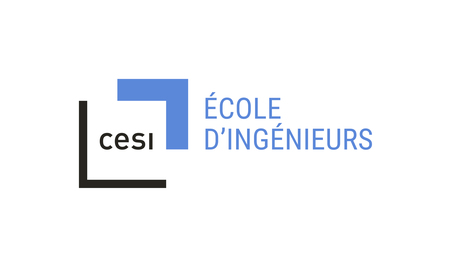


# 1. Introduction
Nous reprenons pour la dernière fois le problème du [sac à dos](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_sac_%C3%A0_dos), et on va chercher à savoir si les algorithmes qu'on a conçus sont efficaces


Commencez par intégrer le code de la recherche tabou que vous avez conçue la dernière fois.

In [2]:
from collections import deque
import random
from functools import lru_cache
 
def random_objets(poids_max, val_max):
    """
    Cette fonction génère des objets de poids et de valeur
    aléatoires (bornés par les valeurs passées en parametre).
    Renvoie un tuple de 2 dictionnaires (poids,valeur)
    """
    poids_objets =\
        {i: random.randint(1, poids_max) for i in range(nb_objets)} #SOLUTION
    valeur_objets =\
        {i: random.randint(1, val_max) for i in range(nb_objets)}   #SOLUTION
                                                                    #SOLUTION
    return poids_objets, valeur_objets                              #SOLUTION
 
def random_solution():
    sac = tuple(random.choice([False, True]) for _ in range(nb_objets)) #SOLUTION
                                                                        #SOLUTION
    while (poids_contenu(sac) > capacite):                              #SOLUTION
        objets_presents = tuple(                                        #SOLUTION
            i for i, val in enumerate(sac) if val)                      #SOLUTION
        objet_supprime = random.choice(objets_presents)                 #SOLUTION
        sac = sac[:objet_supprime] + (False,) + sac[objet_supprime+1:]  #SOLUTION
                                                                        #SOLUTION
    return sac                                                          #SOLUTION
 
@lru_cache(maxsize=None)
def poids_contenu(sac):
    """
    Cette fonction renvoie la somme des poids des objets dans le sac
    """
    return sum(poids_objets[i] for i, val in enumerate(sac) if val) #SOLUTION
 
@lru_cache(maxsize=None)
def valeur_contenu(sac):
    """
    Cette fonction renvoie la somme des valeurs des objets dans le sac
    """
    return sum(valeur_objets[i] for i, val in enumerate(sac) if val) #SOLUTION
 
@lru_cache(maxsize=None)
def voisinage(sac):
    voisins = []                                                     #SOLUTION
    for k in range(len(sac)):                                        #SOLUTION
        voisin = sac[:k] + (not(sac[k]),) + sac[k+1:]                #SOLUTION
        if (poids_contenu(voisin) <= capacite):                      #SOLUTION
            voisins.append(voisin)                                   #SOLUTION
    return voisins                                                   #SOLUTION
 
def recherche_tabou(solution_initiale, taille_tabou, iter_max):
    """
    1. On part d'un élément de notre ensemble de recherche qu'on déclare élément courant
    2. On considère le voisinage de l'element courant et on choisit le  meilleur d'entre
       eux comme nouvel element courant, parmi ceux absents de la liste tabou, et on l'ajoute
       a la liste tabou
    3. On boucle jusqu'a condition de sortie.
    """
    nb_iter = 0                                                                #SOLUTION
    liste_tabou = deque((), maxlen = taille_tabou)                             #SOLUTION
                                                                               #SOLUTION
    # variables solutions pour la recherche du voisin optimal non tabou        #SOLUTION
    solution_courante = solution_initiale                                      #SOLUTION
    meilleure = solution_initiale                                              #SOLUTION
    meilleure_globale = solution_initiale                                      #SOLUTION
                                                                               #SOLUTION
    # variables valeurs pour la recherche du voisin optimal non tabou          #SOLUTION
    valeur_meilleure = valeur_contenu(solution_initiale)                       #SOLUTION
    valeur_meilleure_globale = valeur_meilleure                                #SOLUTION
                                                                               #SOLUTION
    while (nb_iter < iter_max):                                                #SOLUTION
        valeur_meilleure = -1                                                  #SOLUTION
                                                                               #SOLUTION
        # on parcourt tous les voisins de la solution courante                 #SOLUTION
        for voisin in voisinage(solution_courante):                            #SOLUTION
            valeur_voisin=valeur_contenu(voisin)                               #SOLUTION
                                                                               #SOLUTION
            # MaJ meilleure solution non taboue trouvée                        #SOLUTION
            if valeur_voisin > valeur_meilleure and voisin not in liste_tabou: #SOLUTION
                valeur_meilleure = valeur_voisin                               #SOLUTION
                meilleure = voisin                                             #SOLUTION
                                                                               #SOLUTION
        # on met à jour la meilleure solution rencontrée depuis le début       #SOLUTION
        if valeur_meilleure > valeur_meilleure_globale:                        #SOLUTION
            meilleure_globale = meilleure                                      #SOLUTION
            valeur_meilleure_globale = valeur_meilleure                        #SOLUTION
            nb_iter = 0                                                        #SOLUTION
        else:                                                                  #SOLUTION
            nb_iter += 1                                                       #SOLUTION
                                                                               #SOLUTION
        # on passe au meilleur voisin non tabou trouvé                         #SOLUTION
        solution_courante = meilleure                                          #SOLUTION
                                                                               #SOLUTION
        # on met à jour la liste tabou                                         #SOLUTION
        liste_tabou.append(solution_courante)                                  #SOLUTION
                                                                               #SOLUTION
    return meilleure_globale                                                   #SOLUTION

Relançons notre méthode&nbsp;!

In [3]:
nb_objets = 100
capacite = 20
random.seed(a=3)
poids_objets, valeur_objets = random_objets(10, 10)
sac = (False,)*nb_objets

print("tabou de taille 5")
sol = recherche_tabou(sac, taille_tabou=5, iter_max=30)
print("valeur finale = " + str(valeur_contenu(sol)) + ", capacite="+str(poids_contenu(sol)) + "/" + str(capacite))
print([i for i, val in enumerate(sol) if val]) # composition de la solution


print("wks 2 : ")
print(sac)


tabou de taille 5
valeur finale = 62, capacite=20/20
[24, 27, 30, 41, 44, 45, 62]
wks 2 : 
(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False)


# 2. Comportement de l'algorithme

Avec notre algorithme, on obtient une solution réalisable, mais on ne sait pas vraiment comment l'algorithme l'a obtenue. Difficile dans ces conditions d'imaginer ce qu'on pourrait faire pour améliorer la solution obtenue. Essayons déjà de voir comment l'algorithme arrive à ce résultat.

## 2.1 Étude de la trajectoire

Commençons par étudier la trajectoire que suit notre algorithme. C'est assez simple, il suffit de retenir toutes les solutions courantes et l'historique des meilleures solutions trouvées à chaque itération, et d'afficher tout ça avec [matplotlib](https://matplotlib.org/index.html). Allons-y !



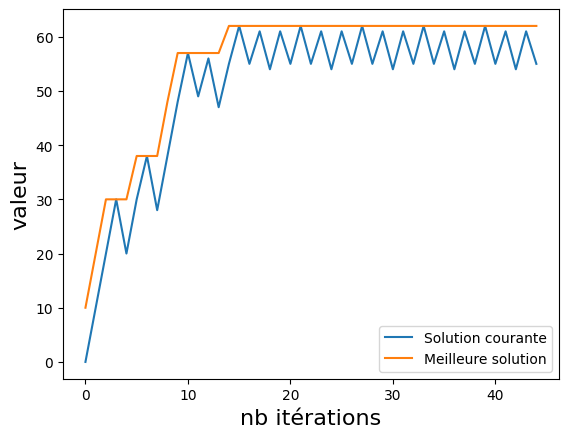

In [4]:
import matplotlib.pyplot as plt

def recherche_tabou_traject(solution_initiale, taille_tabou, iter_max):
    """
    1. On part d'un élément de notre ensemble de recherche qu'on déclare élément courant
    2. On considère le voisinage de l'élément courant, on choisit le meilleur d'entre
       eux comme nouvel élément courant parmi ceux absents de la liste tabou, et on l'ajoute
       à la liste tabou
    3. On boucle jusqu'à condition de sortie.
    """
    nb_iter = 0
    liste_tabou = deque((), maxlen=taille_tabou)

    # Variables solutions pour la recherche du voisin optimal non tabou
    solution_courante = solution_initiale
    meilleure = solution_initiale
    meilleure_globale = solution_initiale

    # Variables valeurs pour la recherche du voisin optimal non tabou
    valeur_meilleure = valeur_contenu(solution_initiale)
    valeur_meilleure_globale = valeur_meilleure
    
    # Liste des solutions courantes et des meilleures trouvées, pour afficher la trajectoire
    # L'élément à la ième position correspond à l'itération i
    courantes = deque(())  #À COMPLÉTER
    meilleures_courantes = deque(()) #À COMPLÉTER
    
    while nb_iter < iter_max:
        nb_iter += 1
        valeur_meilleure = 0
        
        # On parcourt tous les voisins de la solution courante
        for voisin in voisinage(solution_courante):
            valeur_voisin = valeur_contenu(voisin)
            if valeur_voisin > valeur_meilleure and voisin not in liste_tabou:  #SOLUTION
                valeur_meilleure = valeur_voisin                               #SOLUTION
                meilleure = voisin

        # On met à jour la meilleure solution rencontrée depuis le début
        if valeur_meilleure > valeur_meilleure_globale:
            meilleure_globale = meilleure
            valeur_meilleure_globale = valeur_meilleure
            nb_iter = 0
        
        meilleures_courantes.append(valeur_meilleure_globale)  #À COMPLÉTER
        courantes.append(valeur_contenu(solution_courante))    #À COMPLÉTER
        
        # On passe au meilleur voisin non tabou trouvé
        solution_courante = meilleure
        
        # On met à jour la liste tabou
        liste_tabou.append(solution_courante)  #À COMPLÉTER

    return meilleure_globale, courantes, meilleures_courantes

sac = (False,) * nb_objets
    
iter_max = 30
taille_tabou = 5
sol, courants, meilleurs_courants = recherche_tabou_traject(sac, taille_tabou, iter_max)

plt.xlabel("nb itérations", fontsize=16)
plt.ylabel("valeur", fontsize=16)
plt.plot(range(len(courants)), courants, label='Solution courante')
plt.plot(range(len(meilleurs_courants)), meilleurs_courants, label='Meilleure solution')
plt.legend()
plt.show()


On observe un phénomène intéressant au bout d'un certain temps. Comment s'appelle-t-il&nbsp;? Comment l'interpréter, et que pourrions-nous faire face à ça&nbsp;?

<em>On observe de l'oscilattion sur les valeurs des solutions trouvés, on arrive a un extremum local on oscille ensuite en desous</em>

Testons cette solution (avec une valeur de 200, par exemple)&nbsp;:

Text(0, 0.5, 'valeur')

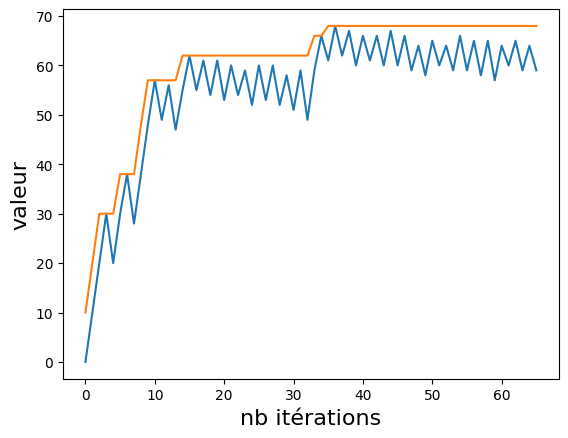

In [76]:
sac=(False,)*nb_objets

iter_max = 30
taille_tabou = 200

sol, courants, meilleurs_courants=recherche_tabou_traject(sac, taille_tabou, iter_max)

plt.plot(range(len(courants)), courants)
plt.plot(range(len(courants)), meilleurs_courants)
plt.xlabel("nb itérations", fontsize=16)
plt.ylabel("valeur", fontsize=16)

Comment interprétez-vous cette courbe&nbsp;?

<em>On arrive à échapper temporairement aux oscillations, la solution est un peu améliorée. </em>

Essayons donc d'augmenter encore la valeur.

Text(0, 0.5, 'valeur')

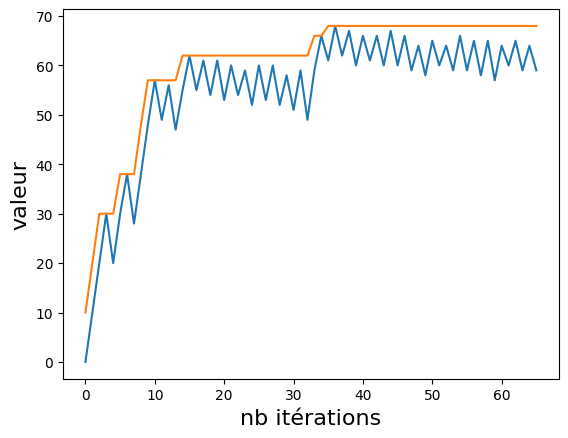

In [5]:
sac=(False,)*nb_objets
taille_tabou = 400
sol, courants, meilleurs_courants=recherche_tabou_traject(sac, taille_tabou, iter_max)

plt.plot(range(len(courants)), courants)
plt.plot(range(len(courants)), meilleurs_courants)
plt.xlabel("nb itérations", fontsize=16)
plt.ylabel("valeur", fontsize=16)

Qu'est-ce que ça donne ? Comment y remédier ?

<em>Le résultat est identique. Comme on n'a pas augmenté le nombre d'itérations, la liste tabou n'a pas le temps de se remplir, et on s'arrête prématurément. Il faut aussi augmenter le nombre d'itérations.</em>

Essayons avec la même valeur que pour la taille de la liste.

Text(0, 0.5, 'valeur')

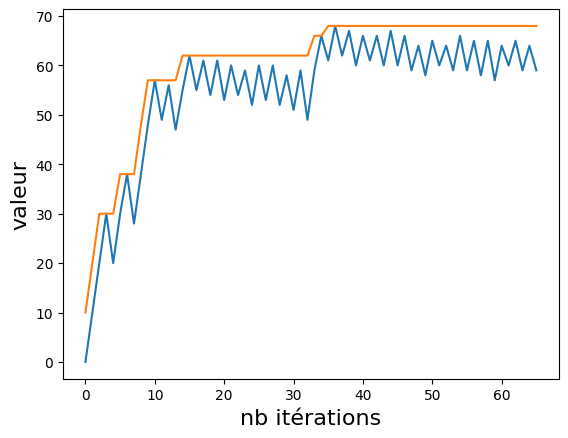

In [6]:
sac=(False,)*nb_objets
#À COMPLÉTER
sol, courants, meilleurs_courants=recherche_tabou_traject(sac, taille_tabou, iter_max)

plt.plot(range(len(courants)), courants)
plt.plot(range(len(courants)), meilleurs_courants)
plt.xlabel("nb itérations", fontsize=16)
plt.ylabel("valeur", fontsize=16)

Qu'observe-t-on ?

<em>Cette fois, la recherche itère plus de fois. Mais malgré ce grand nombre d'itérations, on n'a pas augmenté la solution. 

Il faut donc pousser plus loin la diversification, mais il est probable qu'augmenter encore la taille de la liste ou le nombre d'itérations ne permette d'améliorer significativement la solution que si on met des valeurs nettement plus grandes. C'est suggéré par le fait que la solution se dégrade de plus en plus, mais finit tout de même par augmenter.
    
Cela risque de poser de gros problèmes, tant en termes de temps de calcul que pour la mémoire. Il faudra donc utiliser d'autres techniques que simplement augmenter la taille de la liste tabou. Cette partie sera discutée plus bas.</em>


## 2.2 Qualité de la solution

Mais finalement, on ne sait pas si cette solution que notre algorithme génère est vraiment bonne. On sait qu'on l'a améliorée depuis le Hill-Climbing, et qu'on peut faire mieux, puisque le multi-start y arrive. Or, la question risque d'être difficile à trancher. Pourquoi&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
La question à laquelle on souhaite répondre est : est-on loin de l'optimal&nbsp;? Si on en est très proche, ça ne vaut pas le coup de se lancer dans des optimisations complexes, qui rallongeront le temps de calcul, alors que les opportunités d'améliorer la solution sont minimes.    

Pour comparer avec l'optimal, il faudrait être capable de déterminer cet optimal. Or le problème est $\mathcal{NP}$-Difficile. On peut rechercher manuellement une solution optimale à l'instance générée, mais c'est un peu hasardeux, il faudrait démontrer mathématiquement l'optimalité de la solution qu'on a trouvée, et le travail serait à refaire pour chaque instance. En revanche, on peut déterminer cet optimal pour des petites instances en utilisant une <a href="https://fr.wikipedia.org/wiki/Probl%C3%A8me_NP-complet#M%C3%A9thodes_exactes">méthode exacte</a> (méthode arborescente, programmation dynamique), ou en exploitant des <a href="https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html">bibliothèques d'instances déjà résolues</a>, sur lesquelles on pourra tester notre métaheuristique.
</blockquote>

Mais on pourrait quand même essayer de trouver un point de comparaison, moins précis, mais qui nous apporte quand même quelques informations. Et la solution est en fait très simple, elle se retrouve dans le Workshop sur la programmation linéaire. Souvenez-vous, on avait déjà travaillé sur le problème du sac à dos. Est-ce qu'on avait réussi à le résoudre&nbsp;? Pourquoi&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
Non, car la résolution d'un programme linéaire par l'algorithme du Simplexe ne fonctionne qu'avec des variables de décision réelles. Or nos variables de décision sont binaires, donc entières. On a affaire à un programme linéaire en nombres entiers.
</blockquote>

Et que produisait la méthode de résolution qu'on avait essayé de mettre en place&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
Une solution non réalisable, dont la valeur était supérieure à la solution optimale du problème. En effet, le simplexe génèrera une solution ne tenant pas compte des contraintes d'intégrité des variables de décision, donc une solution moins contrainte (puisqu'une contrainte réduit l'espace des solutions admissibles), meilleure en valeur, mais non réalisable.
</blockquote>

Le voilà notre indicateur&nbsp;! Grace à ça, on va pouvoir mettre en place un [plan d'expériences](https://fr.wikipedia.org/wiki/Plan_d%27exp%C3%A9riences) (inutile par contre d'appliquer directement les principes mathématiques mentionnés dans ce lien, ils sont juste là pour vous donner une idée du principe général et sont des outils rarement utilisés tel quel dans le domaine de l'évaluation d'algorithmes).

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>
En fait, à part l'étude de la trajectoire, ce Workshop lui-même est organisé comme un plan d'expériences. Par exemple, le fait de considérer la recherche simple avant de pouvoir se pencher sur le multi-start, ou la définition d'un indicateur de qualité en premier lieu.

En Recherche Opérationnelle, l'indicateur de <em>qualité d'une solution</em> est la plupart du temps une borne, qu'elle soit obtenue par relaxation de contraintes sur un modèle linéaire, ou de manière algorithmique. C'est le cas ici, et sans le savoir, il y a deux séances, les élèves ont fait de la <a href="https://fr.wikipedia.org/wiki/Relaxation_continue">relaxation continue</a>, ce qui leur a fourni une borne supérieure (puisqu'on traite un problème de maximisation).
</blockquote>

Une fois qu'on a obtenu une borne supérieure de l'optimal pour notre instance, si la solution qu'on a généré est éloignée de la borne, que peut-on en conclure&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
Rien de particulier. La solution peut être mauvaise, mais ça peut être aussi la borne qui est éloignée de l'optimal, ou une combinaison des deux.
</blockquote>

Et si notre solution est proche de la borne&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
Dans ce cas, on peut conclure que la solution est de bonne qualité. C'est donc effectivement moins révélateur que si on pouvait comparer à l'optimal, mais ça nous donne tout de même des informations. Et si on avait d'autres bornes, on pourrait essayer d'affiner ce résultat. Parfois, les problèmes $\mathcal{NP}$-Difficiles admettent des bornes algorithmiques, c'est-à-dire des bornes qui se calculent algorithmiquement. Pour le sac à dos, ce n'est pas évident, mais pour certains problèmes comme le <em>Voyageur de Commerce</em>, il en existe qui sont assez faciles à calculer.

Si on considère, comme ici, un problème de maximisation, il suffit alors de prendre la plus petite borne supérieure de l'instance. Et inversement, la plus grande borne inférieure si on a un problème de minimisation.
</blockquote>

Il ne nous reste plus qu'à reprendre le code de la programmation linéaire. Testons ça&nbsp;:

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>
Les structures de données qu'on utilise pour notre métaheuristique sont déjà adaptées, il n'y a quasiment rien à faire. En plus, il est possible de passer par des dictionnaires et d'utiliser `lpSum()`pour générer les sommes à intégrer au modèle du problème, ça ira bien plus vite&nbsp;!! Cette solution sera utile si les élèves ont de gros programmes à résoudre (ils pourront même charger des fichiers Excel ou JSON pour le faire).
</blockquote>

In [7]:
# on vous donne la solution toute faite !

from pulp import *

def borne_superieure():
    objets = range(nb_objets)

    # variables
    x = LpVariable.dicts('objet', objets, 0, 1)
    
    # probleme
    prob = LpProblem("knapsack", LpMaximize)

    # fonction objective
    cost = lpSum([valeur_objets[i]*x[i] for i in objets])
    prob += cost

    # contrainte
    prob += lpSum([poids_objets[i]*x[i] for i in objets]) <= capacite

    prob.solve()
    return value(prob.objective) if (LpStatus[prob.status] == "Optimal") else None

borne = borne_superieure()
if borne is not None:
    print("borne supérieure : ", borne)
print("valeur de la solution :", str(valeur_contenu(sol)))

borne supérieure :  91.33333329999999
valeur de la solution : 68


Ce n'est pas mal, mais on peut surement faire mieux&nbsp;! Typiquement en faisant du multistart. D'ailleurs, voyons ce que ça donne&nbsp;:

In [8]:
import random
random.seed(a=5)

sol_max = None
val_max = 0

# multi-start de 500 itérations
for _ in range (500):
    sac = random_solution()
    sol_courante = recherche_tabou(sac, taille_tabou, iter_max)
    val_courante = valeur_contenu(sol_courante)
    if (val_courante > val_max):
        val_max = val_courante
        sol_max = sol_courante

print("valeur finale = " + str(valeur_contenu(sol_max)))

valeur finale = 89


Comment interprétez-vous ce résultat&nbsp;?

<em>Puisque les valeurs des objets sont entières, la solution construite par multistart est optimale. Vue la taille réduite du problème et le nombre important de starts, l'algorithme a de très grandes chances de converger vers la solution optimale. On verra dans la suite du Workshop que les choses vont se compliquer sur des instances plus grandes.</em>

Souvenez-vous, au Workshop précédent, deux exécutions du multistart donnaient la même valeur de solution. La voila, l'explication&nbsp;!

Mais on a décidé de s'en tenir aux tabou simple. Revenons-y, et essayons d'avoir une idée plus précise de ses performances.

# 3. Plan d'expérience et optimisation de l'algorithme

On a réussi à construire une solution aux 2/3 de la borne (voire plus si on utilise le multi-start) de notre instance aléatoire. Mais est-ce qu'on peut généraliser ce résultat&nbsp;?

<em>Non, une seule mesure n'est pas représentative. On peut avoir rencontré une instance particulièrement facile. Il va falloir étudier le comportement de cet algorithme de manière un peu plus statistique.</em>


## 3.1 Qualité statistique des solutions

Pour se faire une idée plus exacte des performances de l'algorithme, il faudrait tester un grand nombre d'instances. Mais cette approche pose un gros problème vis-à-vis de l'optimisation qu'on a mise en place la dernière fois pour accélérer les calculs. Quel est ce problème&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
Il faut calculer à chaque fois la distance à la borne inférieure de l'instance considérée. On évaluera ensuite de manière statistique ces distances (le choix exact des statistiques à calculer est abordé plus loin).

Le problème du point de vue du code, c'est qu'on a mis en place une stratégie de mise en cache (mémoïsation) des fonctions de calcul de la valeur et du poids, ainsi que de la génération du voisinage d'une solution. Or, la mémoïsation de ces fonctions ne fonctionne que si l'instance ne change pas, puisqu'une instance est définie par les variables <em>globales</em> <code>poids_objets</code>, <code>poids_objets</code>, <code>nb_objets</code>, et <code>capacite</code>. Si par exemple on change la valeur des objets, la fonction <code>valeur_contenu</code> renverra le calcul effectué avant le changement de valeur, et le résultat sera faux.
</blockquote>

Comment peut-on y remédier sans pour autant renoncer à cette optimisation, qui risque d'être utile si on doit faire un grand nombre d'essais&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
À moins que les étudiants aient regardé la documentation de <a href="https://docs.python.org/3/library/functools.html#functools.lru_cache"><code class="cm-s-ipython language-python"><span class="cm-meta">lru_cache</span></code></a>, il y a de fortes chances qu'ils proposent de réimplémenter les fonctions en passant à chaque fois l'instance en paramètre. Cette approche pose plusieurs problèmes &nbsp;:
<ul>
    <li>La performance de la mémoïsation baisse au fur et à mesure qu'on ajoute des paramètres d'entrée, puisque ces paramètres doivent être hashés pour pouvoir les utiliser comme clé d'accès au cache.</li>
    <li>Ici, ça ne fonctionnera pas en l'état, car, comme dit au dessus, les arguments qu'elle prend en paramètres sont hashés pour accéder au cache. Or, les dictionnaires, qui servent pour la valeur et le poids des objets, ne sont pas hashables. En implémentant cette approche, on obtiendrait une erreur à l'exécution.</li>
</ul>

Et il existe une solution bien plus simple&nbsp;: effacer le cache de la fonction. Pour cela, il y a deux solutions&nbsp;:
<ul>
    <li>On peut vider le cache d'une fonction mémoïsée d'un simple appel à la méthode <code>cache_clear()</code> de la fonction (puisqu'en Python, une fonction est un objet). Pour vider le cache de la fonction<code>poids_contenu</code>, par exemple, on exécute <code>poids_contenu.cache_clear()</code>. Évidemment, ça doit être fait sur toutes les fonctions mémoïsées. Le plus simple est d'implémenter cette réinitialisation du cache directement dans la fonction de génération d'instance aléatoire.</li>
    <li>L'autre solution, plus élégante mais plus subtile, consiste à implémenter une fonction principale <code>recherche_tabou</code>, et à définir toutes les autres fonctions (dont celles mémoïsées), comme des <a href="https://www.delftstack.com/howto/python/nested-functions-python/">fonctions imbriquées dans cette fonction principale</a>&nbsp;:
<pre><code class="cm-s-ipython language-python">
<span class="cm-keyword">def</span> <span class="cm-def">recherche_tabou</span>(<span class="cm-variable">nb_objets</span>, <span class="cm-variable">capacite</span>, <span class="cm-variable">poids_objets</span>, <span class="cm-variable">valeur_objets</span>, <span class="cm-comment">#instance</span>
                    <span class="cm-variable">solution_initiale</span>, <span class="cm-variable">taille_tabou</span>, <span class="cm-variable">iter_max</span>): <span class="cm-comment">#paramètres de l'algo</span>
    <span class="cm-meta">@</span><span class="cm-meta">lru_cache</span>(<span class="cm-variable">maxsize</span><span class="cm-operator">=</span><span class="cm-keyword">None</span>)
    <span class="cm-keyword">def</span> <span class="cm-def">poids_contenu</span>(<span class="cm-variable">sac</span>):
        <span class="cm-keyword">return</span> <span class="cm-builtin">sum</span>(<span class="cm-variable">poids_objets</span>[<span class="cm-variable">i</span>] <span class="cm-keyword">for</span> <span class="cm-variable">i</span>, <span class="cm-variable">val</span> <span class="cm-keyword">in</span> <span class="cm-builtin">enumerate</span>(<span class="cm-variable">sac</span>) <span class="cm-keyword">if</span> <span class="cm-variable">val</span>)<br>
    <span class="cm-meta">@</span><span class="cm-meta">lru_cache</span>(<span class="cm-variable">maxsize</span><span class="cm-operator">=</span><span class="cm-keyword">None</span>)
    <span class="cm-keyword">def</span> <span class="cm-def">valeur_contenu</span>(<span class="cm-variable">sac</span>):
        <span class="cm-variable">…</span>
</code></pre>
Non seulement les fonctions imbriquées sont redéclarées à chaque appel du fait de la portée de ces sous-fonctions (ce qui réinitialise leur cache), mais cela permet de convertir en paramètres de la fonction principale les variables globales définissant une instance, ce qui est plus propre en terme d'organisation du code. Et les fonctions imbriquées n'ont pas besoin d'être modifiées puisqu'elles accèdent à toutes les variables visibles depuis cette fonction principale (plus précisément, à une copie locale de ces variables,si on voulait modifier ces variables dans une fonction interne il faudrait utiliser le mot-clé <a href="https://www.w3schools.com/python/ref_keyword_nonlocal.asp"><code class="cm-s-ipython language-python"><span class="cm-keyword">nonlocal</span></code></a>). De plus, sur de grosses instances, le fait de ne pas avoir à faire la résolution de variables globales permet de gagner un peu de temps de calcul par rapport à la solution précédente.</li>
</ul>

Par soucis de lisibilité, c'est la première solution qui est présentée ici, elle est acceptable. Mais si les étudiants sont suffisamment à l'aise avec Python, la seconde est recommandée.
</blockquote>

Corrigeons ça tout de suite&nbsp;!

In [9]:
def random_objets(poids_max, val_max):
    """
    Cette fonction genere des objets de poids et de valeur
    aleatoires (borne par les valeurs passees en parametre).
    
    Renvoie un tuple de 2 dictionnaires (poids,valeur)
    """
    
    poids_contenu.cache_clear()  #SOLUTION
    valeur_contenu.cache_clear() #SOLUTION
    voisinage.cache_clear()      #SOLUTION

    poids_objets  = {i: random.randint(1, poids_max) for i in range(nb_objets)}
    valeur_objets = {i: random.randint(1, val_max)   for i in range(nb_objets)}    
    return poids_objets, valeur_objets



Problème résolu&nbsp;! On peut attaquer l'implémentation de notre test statistique. Reprenons la taille de tabou et le nombre d'itérations qui ont donné de bons résultats tout à l'heure. Par ailleurs, pour essayer d'augmenter la représentativité de nos résultats, on va fournir à la recherche une solution initiale aléatoire à chaque test.

Et vu qu'on recommence à avoir des calculs qui prennent du temps, on va réutiliser la barre de progression du premier Workshop. Pour cette fois, le code vous est rappelé.

In [10]:
from ipywidgets import IntProgress
from IPython.display import display


sac=(False,)*nb_objets

iter_max = 30
taille_tabou = 200

random.seed(a=3)
bornes = deque([])

# paramètres du test
nb_tests = 200

# on affiche la barre de progression
bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
display(bar)

for _ in range(nb_tests):
    sac = random_solution()

    sol, courants, meilleurs_courants=recherche_tabou_traject(sac, taille_tabou, iter_max)
    distance = borne_superieure() - valeur_contenu(sol)

    bornes.append(distance)
    bar.value += 1

# on cache la barre de progression
bar.close()

t = sum(bornes) / len(bornes)
print(t)


IntProgress(value=0, layout=Layout(width='100%'), max=200)

21.803333299999995


Regardons un peu plus en détail les valeurs qu'on obtient. Ça tombe bien, on a la liste de toutes les distances. Comment pourrait-on examiner plus en détail ces valeurs&nbsp;?

<em>en faisant un histogramme</em>

Essayons ça&nbsp;!

Text(0.5, 1.0, 'histogramme')

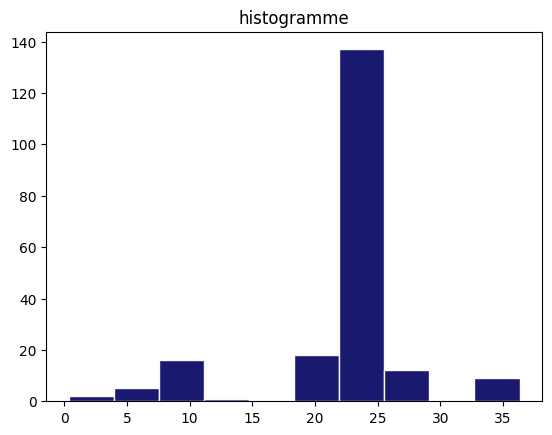

In [11]:
import matplotlib.pyplot as plt

plt.hist(bornes

, color = 'midnightblue',
            edgecolor = 'snow')
plt.title('histogramme')

68.48432806277874


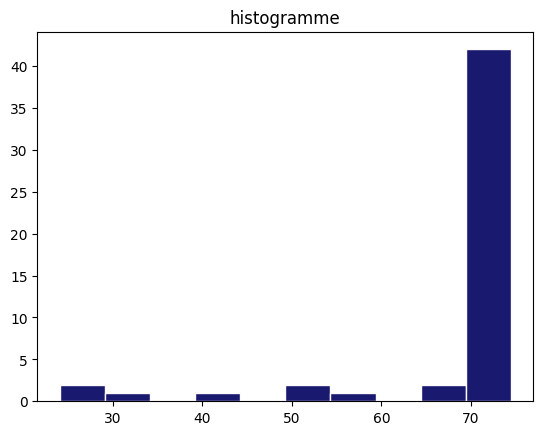

In [12]:
import matplotlib.pyplot as plt

chepa = []
for i in range (0, len(meilleurs_courants)):
    chepa.append((meilleurs_courants[i]  / borne) *100)
                 
plt.hist(chepa, color = 'midnightblue',
            edgecolor = 'snow')
plt.title('histogramme')

moyenne = 0
for i in range (0 ,len(chepa)):
    moyenne = moyenne + chepa[i]
print(moyenne / len(chepa))

Le gros des valeurs se situe entre 10 et 30. Seulement, ça ne nous dit pas grand chose. Quelle information nous manque-t-il&nbsp;?

<em>Il faudrait mettre en relation la distance avec la valeur de la borne, sous forme par exemple d'un pourcentag</em>

Pas de chance, il faut refaire les calculs&nbsp;!



IntProgress(value=0, layout=Layout(width='100%'), max=200)

Text(0.5, 1.0, 'Distribution des distances à la borne supérieure')

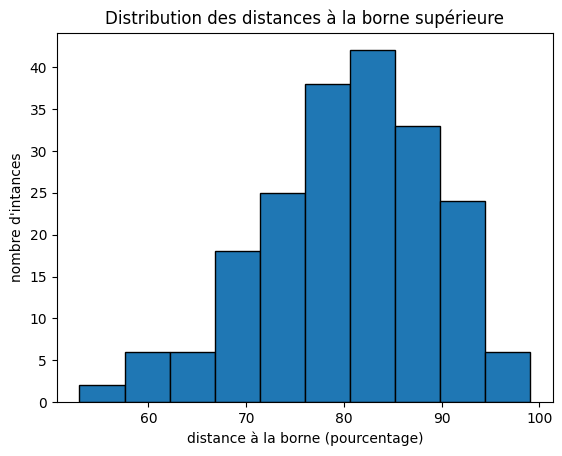

In [13]:
random.seed(a=3)
bornes = deque(())

# on affiche la barre de progression
bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
display(bar)

for _ in range(nb_tests):
    # génération aléatoire de l'instance et calcul de   #SOLUTION
    # sa borne supérieure.                              #SOLUTION
    poids_objets, valeur_objets = random_objets(10, 10) #SOLUTION
    borne = borne_superieure()                          #SOLUTION
                                                        #SOLUTION
    sac = random_solution()                             #SOLUTION
    sol = recherche_tabou(sac, taille_tabou, iter_max)  #SOLUTION
    val = valeur_contenu(sol)                           #SOLUTION
    distance = val*100/borne                            #SOLUTION
    bornes.append(distance)                             #SOLUTION
    bar.value += 1                                      #SOLUTION

# on cache la barre de progression
bar.close()

plt.hist(bornes, edgecolor = "black")                         #SOLUTION
plt.xlabel("distance à la borne (pourcentage)")               #SOLUTION
plt.ylabel("nombre d'intances")                               #SOLUTION
plt.title("Distribution des distances à la borne supérieure") #SOLUTION

Là, c'est plus lisible&nbsp;! On voit bien que la grande majorité de nos solutions se situent au dessus de 70% de la borne. Quelle est la valeur la plus représentative du comportement de l'algorithme&nbsp;? Quelles statistiques descriptives pourraient répondre à cette question&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
On peut regarder la valeur médiane, ou la moyenne. La moyenne semble plus intéressante, puisqu'on peut lui associer l'écart-type (même s'il est aussi possible d'associer à la médiane l'écart absolu médian, mais les étudiants ne connaissent probablement pas cette statistique), afin de se faire une idée de la dispersion des valeurs autour de la moyenne.
</blockquote>

Regardons ce que ça donne. Selon les performances, on pourra utiliser les fonction du module de [statistiques](https://docs.python.org/fr/3.7/library/statistics.html) standard de Python, ou les [fonctions statistiques de NumPy](https://numpy.org/doc/stable/reference/routines.statistics.html).

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>
Un test rapide montre les choix d'implémentation optimaux&nbsp;:
<ul>
    <li>Pour la moyenne, la fonction <code>mean</code> du module <code>statistics</code> a un gros défaut&nbsp;: elle est très lente (du fait de sa <a href="https://fr.wikipedia.org/wiki/Stabilit%C3%A9_num%C3%A9rique">stabilité numérique</a>, pas très utile ici). Mieux vaut se tourner vers <code>fmean</code> du même module, moins précise mais nettement plus rapide (et aussi plus rapide que la version de NumpPy ou qu'une implémentation manuelle du type <code class="cm-s-ipython language-python"><span class="cm-builtin">sum</span>(<span class="cm-variable">bornes</span>)<span class="cm-operator">/</span><span class="cm-builtin">len</span>(<span class="cm-variable">bornes</span>)</code>.</li>
    <li>Pour l'écart-type, la fonction <code>std</code> de NumPy est la plus rapide.</li>
    <li>Pour la médiane, c'est de nouveau le module <code>statistics</code> qui propose la version la plus rapide avec la fonction <code>median</code>.</li>
</ul>
Il est possible de fournir directement ces résultats aux étudiants.
</blockquote>

In [14]:
import statistics
import numpy as np

print("médiane={:.2f}".format(statistics.median(bornes))) #SOLUTION
print("moyenne={:.2f}, écart-type={:.2f}".format(         #SOLUTION
      statistics.fmean(bornes),np.std(bornes)))           #SOLUTION

médiane=80.98
moyenne=80.30, écart-type=8.84


Là, c'est plus lisible&nbsp;! On voit bien que la grande majorité de nos solutions se situent au dessus de 70% de la borne. Quelle est la valeur la plus représentative du comportement de l'algorithme&nbsp;? Quelles statistiques descriptives pourraient répondre à cette question&nbsp;?

<em>À COMPLÉTER</em>

Regardons ce que ça donne. Selon les performances, on pourra utiliser les fonction du module de [statistiques](https://docs.python.org/fr/3.7/library/statistics.html) standard de Python, ou les [fonctions statistiques de NumPy](https://numpy.org/doc/stable/reference/routines.statistics.html).



## 3.2 Optimisation des paramètres de l'algorithme

Si le comportement semble assez acceptable, il y a tout de même des instances pour lesquelles les choses se passent un peu moins bien. Est-ce qu'on ne pourrait pas trouver un paramétrage de l'algorithme qui s'en sort mieux avec ces instances&nbsp;?

Pour répondre à cette question, on va regarder l'impact de la taille de la liste tabou sur la qualité. Le but va être d'afficher avec Matplotlib la moyenne sous la forme d'une courbe, et l'écart-type par une "bande" entourant la courbe&nbsp;:
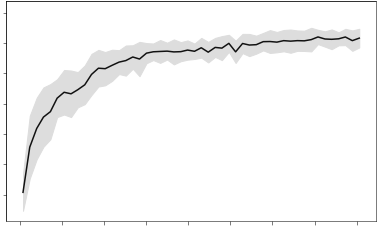



IntProgress(value=0, layout=Layout(width='100%'), max=1900)

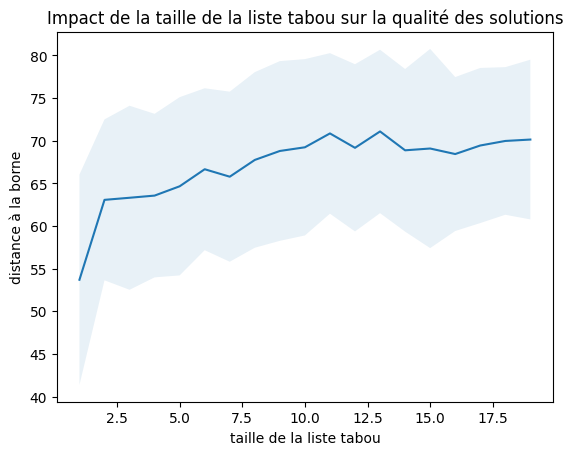

In [16]:
random.seed(a=3)

# paramètres du test
tabou_min = 1
tabou_max = 20
nb_objets = 200

nb_test  = 100
iter_max = 20

# on affiche la barre de progression
nb_steps_bar =\
    (tabou_max-tabou_min)*nb_test #SOLUTION
bar = IntProgress(min=0, max=nb_steps_bar, layout={"width" : "100%"})
display(bar)

# pour stocker les résultats
moyennes   = []
deviations = []

random.seed(a=3)

# cette fois on boucle sur la taille de la liste tabou
for taille_tabou in range(tabou_min, tabou_max):            #SOLUTION
    bornes = deque(())                                      #SOLUTION
    for _ in range(nb_test):                                #SOLUTION
        # génération aléatoire de l'instance et calcul de   #SOLUTION
        # sa borne supérieure.                              #SOLUTION
        poids_objets, valeur_objets = random_objets(10, 10) #SOLUTION
        borne = borne_superieure()                          #SOLUTION
                                                            #SOLUTION
        sac = random_solution()                             #SOLUTION
        sol = recherche_tabou(sac, taille_tabou, iter_max)  #SOLUTION
        val = valeur_contenu(sol)                           #SOLUTION
        bar.value += 1                                      #SOLUTION
        distance = val*100/borne                            #SOLUTION
        bornes.append(distance)                             #SOLUTION
                                                            #SOLUTION
    # en fait, pour la moyenne, le calcul manuel reste      #SOLUTION
    # l'implémentation la plus rapide                       #SOLUTION
    moyennes.append(statistics.fmean(bornes))               #SOLUTION
    deviations.append(np.std(bornes))                       #SOLUTION

# on cache la barre de progression
bar.close()

# affichage de la courbe de moyenne
plt.plot(range(tabou_min, tabou_max), moyennes)

# affichage de la bande d'écart-type
plt.fill_between(range(tabou_min, tabou_max),
                 np.subtract(moyennes, deviations), # borne haute
                 np.add(moyennes, deviations),      # borne basse
                 alpha=.1)                          # transparence
plt.xlabel("taille de la liste tabou")
plt.ylabel("distance à la borne")
plt.title("Impact de la taille de la liste tabou sur la qualité des solutions")
plt.show()

Qu'observez-vous&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
On observe le phénomène qu'on avait déjà rencontré pus haut. Quand on augmente la taille de la liste tabou, la qualité des solutions s'améliore. Mais on finit par atteindre une situation stationnaire. Comme on l'avait déjà vu, si on ne change pas le nombre d'itérations de la recherche, à partir d'un certain niveau la liste n'a pas le temps d'être remplie. Comme ce nombre d'itérations est trop faible, agrandir la taille de la liste tabou ne change en fait rien à partir d'une certaine valeur.<br>

Ici, la situation se stabilise vers une taille de 10. En dessous, on générera des solutions de moins bonne qualité. Au dessus, on rallongera considérablement le temps de calcul sans gain notable.

À noter, on obtient le même profil général si on augmente le nombre de tests, c'est donc un résultat représentatif. 
</blockquote>

Cela ouvre des perspectives pour continuer les tests, et en tirer des conclusions sur les paramètres les plus efficaces de l'algorithme. Comment pourrait-on procéder&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
Il faudrait tester d'autres combinaisons <em>taille de la liste tabou</em> / <em>nombre d'itérations de la recherche</em>, afin de trouver les combinaisons les plus efficaces. Idéalement, on en déduirait une définition fonctionnelle optimale de ces paramètres (la valeur d'un des paramètres permet de calculer l'autre).

Voici la courbe qu'on obtient lorsqu'on revient à 200 itérations, en faisant varier la taille de la liste tabou entre 10 et 200 (quelques heures de calcul), et avec 2000 tests par itération pour avoir un résultat plus représentatif. Affichez-la et discutez avec les étudiants de ce résultat.

![tabou100.png](attachment:tabou100.png)

On remarque que dans les deux cas, une taille de liste obtenue en divisant par 2 le nombre d'itérations semble être le bon paramétrage, en tous cas pour le type d'instances qu'on a considéré. C'est évidemment à vérifier avec d'autres expériences.
</blockquote>

Si on veut vérifier ça de manière automatique, comment pourrait-on procéder&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
Dans la mesure où la qualité ne se stabilise jamais complètement, il faut décider d'un seuil de variation en dessous duquel on considère que la solution ne s'améliore plus (sous forme de pourcentage). On pourra ensuite déterminer automatiquement l'évolution de la valeur de stabilisation de la taille de la liste tabou, en fonction de l'évolution du nombre d'itérations. On pourra vérifier si notre hypothèse d'une relation linéaire de coefficient 2 entre ces deux paramètres se vérifie.
</blockquote>

En tous cas, tout porte à croire que notre paramétrage de l'algorithme n'était pas optimal. On perdait en temps de calcul par rapport à la qualité de la solution générée.

## 3.3 Impact des paramètres d'instance

Mais finalement, on veut améliorer les performances sur ces instances difficiles, alors qu'on ne sait même pas ce qui les rend compliquées à résoudre. Du coup, la question qu'on peut se poser, c'est&nbsp;: qu'est-ce qui rend une instance difficile&nbsp;?

Pour commencer, on va jouer sur le nombre d'objets, c'est ce qu'il y a de plus simple à implémenter.


In [ ]:
random.seed(a=3)

# paramètres du test
objets_min   = 20
objets_max   = 220
objets_steps = 20
nb_test      = 200

taille_tabou = 5
iter_max     = taille_tabou*2

nb_steps_bar =\
    ((objets_max-objets_min)/objets_steps)*nb_test #SOLUTION

# on affiche la barre de progression
bar = IntProgress(min=0, max=nb_steps_bar, layout={"width" : "100%"})
display(bar)

# pour stocker les résultats
moyennes   = []
deviations = []

# on fait varier le nombre d'objets dans la génération aléatoire d'instances 
for nb_objets in range(objets_min, objets_max, objets_steps): #SOLUTION
    bornes = deque(())                                        #SOLUTION
    for _ in range(nb_test):                                  #SOLUTION
        # génération aléatoire de l'instance et calcul de sa  #SOLUTION
        # borne supérieure.                                   #SOLUTION
        poids_objets, valeur_objets = random_objets(10, 10)   #SOLUTION
        borne = borne_superieure()                            #SOLUTION
                                                              #SOLUTION
        sac = random_solution()                               #SOLUTION
        sol = recherche_tabou(sac, taille_tabou, iter_max)    #SOLUTION
        val = valeur_contenu(sol)                             #SOLUTION
        bar.value += 1                                        #SOLUTION
        distance = val*100/borne                              #SOLUTION
        bornes.append(distance)                               #SOLUTION
    moyennes.append(statistics.fmean(bornes))                 #SOLUTION
    deviations.append(np.std(bornes))                         #SOLUTION

# on cache la barre de progression
bar.close()

# affichage de la courbe de moyenne
plt.plot(range(objets_min, objets_max, objets_steps), moyennes)

# affichage de la bande d'écart-type
plt.fill_between(range(objets_min, objets_max, objets_steps),
                 np.subtract(moyennes, deviations), # borne haute
                 np.add(moyennes, deviations),      # borne basse
                 alpha=.1)                          # transparence
plt.ylim(top=100)
plt.xlabel("nombre d'objets disponibles")
plt.ylabel("distance à la borne")
plt.title("Impact du nombre d'objets sur la qualité des solutions")
plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=2000)

Que pensez-vous de ces résultats&nbsp;? Comment les interprétez-vous&nbsp;?

<em>À COMPLÉTER</em>


## 3.4 Pour aller plus loin

Il y a encore beaucoup de choses qu'on pourrait étudier pour comprendre et surtout améliorer le fonctionnement de notre algorithme (sans compter les calculs de vous devriez peut-être refaire avec un plus grand nombre de tests par configuration). On n'a regardé que des paramètres seuls, pas la manière dont ils peuvent se combiner (ou très peu). Et puis on ne s'est pas du tout penchés sur le temps de calcul. Comme lorsqu'on étudiait la complexité théorique des algorithmes, mesurer le temps d'occupation CPU ne sera pas forcément pertinent. Quelle métrique vous semble avoir du sens&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
Le nombre d'itérations nécessaire pour se stabiliser (en utilisant le principe de seuil évoqué plus haut) est un bon indicateur. Attention, lorsqu'on parle du multi-start, on peut compter uniquement le nombre d'itérations totale de toutes les recherches effectuées, ou compter aussi le nombre de starts.

Malgré tout, il est parfois nécessaire de compter le temps CPU, car ce nombre d'itération n'est pas forcément représentatif. On a pu voir de manière empirique, lors du test faisant varier le nombre d'objets, que les instances de petite taille étaient traitées plus rapidement, ce qui s'explique en partie par la taille du voisinage à traiter à chaque itération. Or, cette taille n'impacte pas directement le nombre d'itérations.
</blockquote>

En tous cas, ça nous a permis d'améliorer la qualité de la solution en affinant les paramètres de la recherche tabou pour renforcer la phase de diversification (qui ici semblait nous poser problème). Si on rencontrait des instances plus difficiles, que notre algorithme n'arrive pas à résoudre efficacement, quel que soit le paramétrage, que pourrions-nous faire&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>
Dans ce cas, c'est le principe même de l'étape de diversification qui doit être amélioré.<br>

Parmi les techniques existantes, on peut citer&nbsp;:
<ul>
    <li>On peut utiliser une liste tabou dynamique, dont le comportement est plus évolué (typiquement, on réduit la taille lorsque la solution courante s'améliore, on l'augmente lorsqu'elle diminue, et on la vide lorsque la meilleure solution globale s'améliore).</li>
    <li>On peut utiliser un voisinage plus adapté. Par exemple, pour favoriser la diversification, on peut considérer comme voisin toutes les solutions obtenues en inversant un <em>ou deux</em> objets.</li>
    <li>On peut agir sur la génération du voisinage, par exemple en ne générant qu'un sous-ensemble des voisins, de manière à diriger la recherche (<em>méthode par liste de candidats</em>).</li>
    <li>On peut accepter de passer par des solutions non réalisables (appelées <em>structures de référence</em>) pour atteindre de meilleures solutions réalisables (<em>méthode par chaînes d'éjection</em>).</li>
    <li>On peut implémenter des mécanismes de mémoire à long terme en plus de la liste tabou (mémoire à court terme).  Cette approche nécessite de modéliser la notion de <em>type de mouvement</em> permettant de passer d'une solution à l'autre, en plus (voire à la place) de la notion de voisinage. Ici, un mouvement pourrait consister à ajouter un objet en particulier, ou à ajouter deux objets conjointement, alors qu'un voisin est constitué d'une solution complète. On favoriserait alors les mouvements ayant mené à de meilleures solutions.</li>
    <li>Etc. (il existe un très grand nombre de sophistications de la méthode tabou, y compris pour le problème du sac à dos, la littérature à ce sujet est très abondante).</li>
</ul>
Certaines de ces techniques sont parfois assez complexes, et nécessitent beaucoup d'expérimentation pour donner de bons résultats pour un problème donné.

Pour finir, on peut aussi choisir d'implémenter une métaheuristique différente, mais de toute façon ce travail d'optimisation du paramétrage sera nécessaire.
</blockquote>

Et puis une fois tout ce travail fait (et pas avant), on pourrait aussi regarder le multi-start. Qu'est-ce qui vous semble pertinent&nbsp;?

<blockquote>
Le seul paramètre de l'algorithme qu'on peut regarder, c'est le nombre de starts. Évidemment, plus on en fait mieux c'est. Mais le problème, ce sera le temps de calcul. La question qui se pose, c'est <em>est-il plus intéressant de faire des recherches optimisées mais qui prennent du temps, ou des recherches moins efficaces mais plus rapides, qui permettent donc d'effectuer plus de starts&nbsp;?</em> Pour y répondre, il faut tester des combinaisons (<em>nombre de starts</em>,<em>nombre d'itérations de la recherche</em>), en utilisant à chaque fois la taille de liste tabou la plus adaptée, en s'appuyant sur les résultats précédents.

Le cas extrême est celui d'un Hill-Climbing multi-start. Un test rapide permettra en quelques minutes de vérifier qu'il ne donnera de meilleurs résultats qu'un tabou simple qu'au prix d'un nombre très important de starts. Finalement, cela prendra plus de temps pour avoir le même résultat.
    
Là aussi, on pourra en fonction de ces résultats optimiser le paramétrage du multi-start. Non seulement en définissant le nombre de starts, mais aussi en améliorant la génération aléatoire de solution de départ. On peut par exemple utiliser la mémoire à long terme dont il est question au dessus pour orienter la génération de cette solution de départ.
</blockquote>

# 4 Conclusion

Ce Workshop est maintenant terminé, et on a une idée beaucoup plus précise du comportement de notre métaheuristique.

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>
On a vu que le paramétrage fin des différentes étapes d'une métaheuristique peut grandement impacter son comportement, et le côté stochastique est loin d'être trivial, particulièrement lorsqu'un aspect aléatoire est présent dans l'algorithme (ce qui est par exemple le cas pour le multi-start et le GRASP, ou lorsqu'on fait de la métaoptimisation). La génération de solutions aléatoires de manière uniforme est lui-même un sujet assez compliqué, et qui fait intervenir des notions avancées de probabilités et de processus stochastiques.
</blockquote>


En fait, ce Workshop lui-même est organisé comme un [plan d'expériences](https://fr.wikipedia.org/wiki/Plan_d%27exp%C3%A9riences) (par exemple, le fait de considérer la recherche simple avant de pouvoir se pencher sur le multi-start, ou la définition d'un indicateur de qualité en premier lieu).

Il faudra réfléchir à un plan similaire pour votre projet, de manière à ne pas perdre de temps (d'autant que les calculs sont plutôt longs). Par contre, ne poussez pas la démarche jusqu'à appliquer les principes mathématiques mentionnés dans le lien précédent, ce sont des outils rarement utilisés tel quel dans le domaine de l'évaluation d'algorithmes.

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>
La notion de plan d'expériences est fondamentale, il faut vraiment sensibiliser les étudiants au fait que l'ensemble de ce Workshop est l'implémentation d'un plan d'expérience (à part une erreur volontaire sur l'indicateur de qualité, qui sert à illustrer le coût d'une erreur de conception). C'est l'un des livrables de leur projet, et un plan d'expérience mal conçu ne leur permettra pas d'obtenir des résultats révélateurs, notamment à cause du temps de calcul prohibitif.

Il faut par contre insister sur le fait que les méthodes formelles issues des plans d'expériences numériques n'est pas du tout à maîtriser ici. Par ailleurs, il est fortement recommandé de stocker les résultats des calculs (par exemple dans des fichiers JSON) avec une convention de nommage qui permet de retrouver facilement le paramétrage de l'expérience.
</blockquote>

Vous avez maintenant toutes les armes pour, non seulement concevoir et implémenter une métaheuristique, mais aussi analyser son comportement et optimiser ses paramètres pour en tirer le meilleur.